In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
data = pd.read_csv('/content/tips (data for regression problem).csv')


In [41]:
print(data.head())
print(data.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


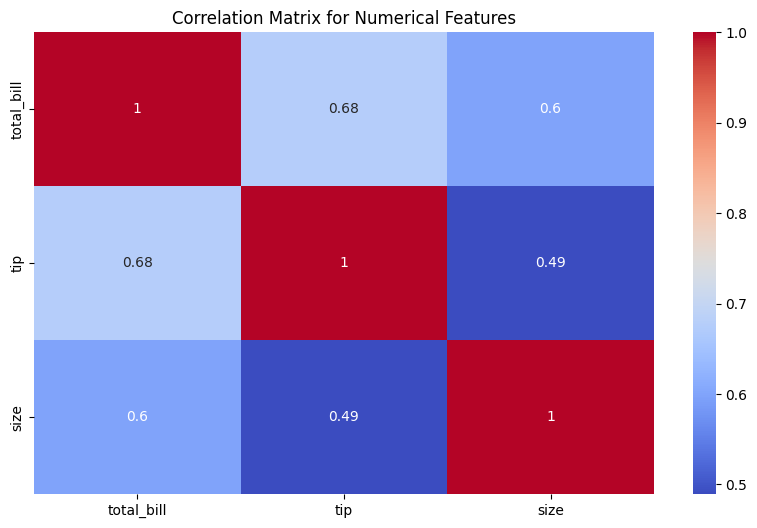

In [42]:
# Apply correlation only to numerical features
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

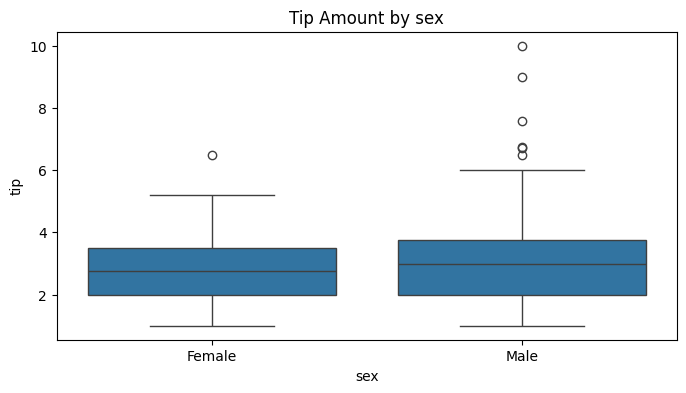

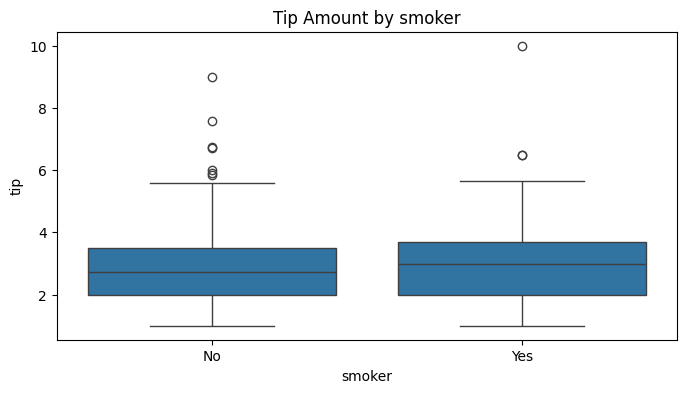

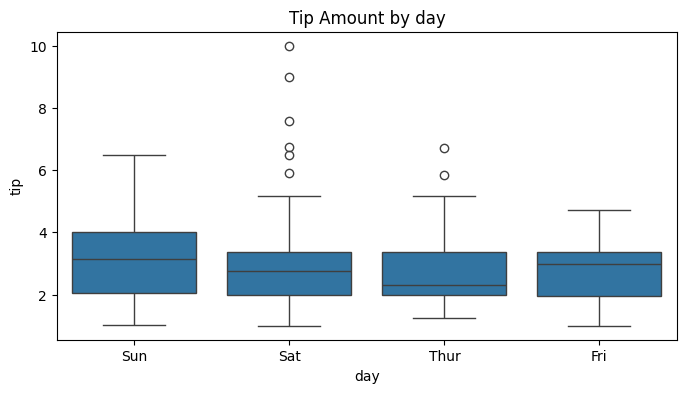

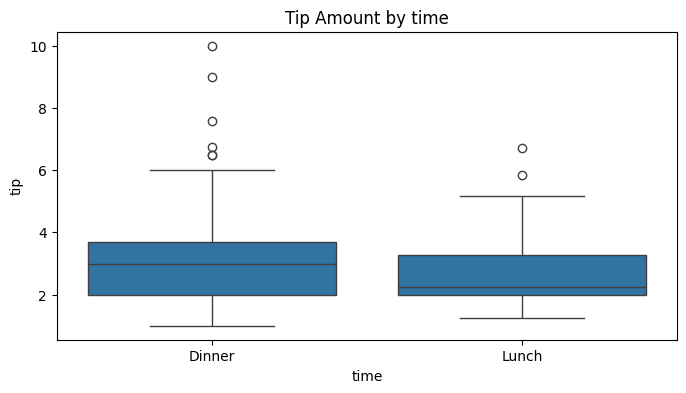

In [43]:
# Analyze categorical features using count plots and box plots
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=feature, y='tip', data=data)
    plt.title(f'Tip Amount by {feature}')
    plt.show()

In [44]:
# Data preprocessing
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop('tip', axis=1)
y = data['tip']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

In [46]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("-" * 30)

Linear Regression Results:
MAE: 0.76
MSE: 1.00
R-squared: 0.23
------------------------------
Ridge Results:
MAE: 0.75
MSE: 0.99
R-squared: 0.23
------------------------------
Lasso Results:
MAE: 0.67
MSE: 0.75
R-squared: 0.42
------------------------------
Decision Tree Results:
MAE: 0.82
MSE: 1.13
R-squared: 0.13
------------------------------
Random Forest Results:
MAE: 0.76
MSE: 0.91
R-squared: 0.30
------------------------------
SVR Results:
MAE: 0.62
MSE: 0.74
R-squared: 0.43
------------------------------
KNN Results:
MAE: 0.78
MSE: 1.04
R-squared: 0.20
------------------------------


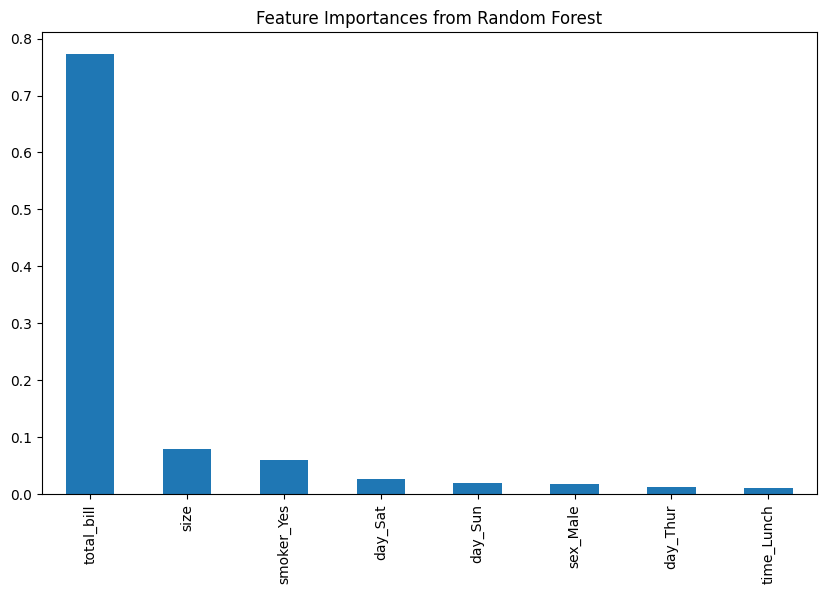

Key Factors Impacting Tip Amounts:
total_bill    0.772692
size          0.079700
smoker_Yes    0.060657
day_Sat       0.026773
day_Sun       0.019360
dtype: float64


In [47]:
# Feature importance analysis for ensemble methods
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.show()

# Insights for management
print("Key Factors Impacting Tip Amounts:")
print(feature_importances.head())

In [48]:
# Q.2

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

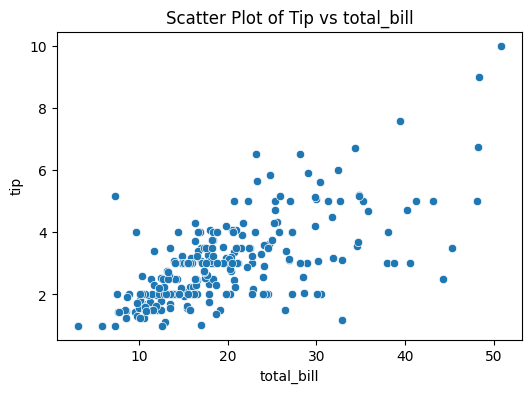

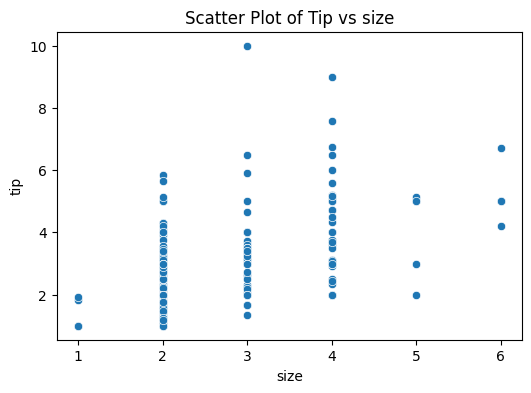

In [50]:
# Scatter plots for feature vs target variable
numerical_features = data.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    if feature != 'tip':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=feature, y='tip', data=data)
        plt.title(f'Scatter Plot of Tip vs {feature}')
        plt.show()

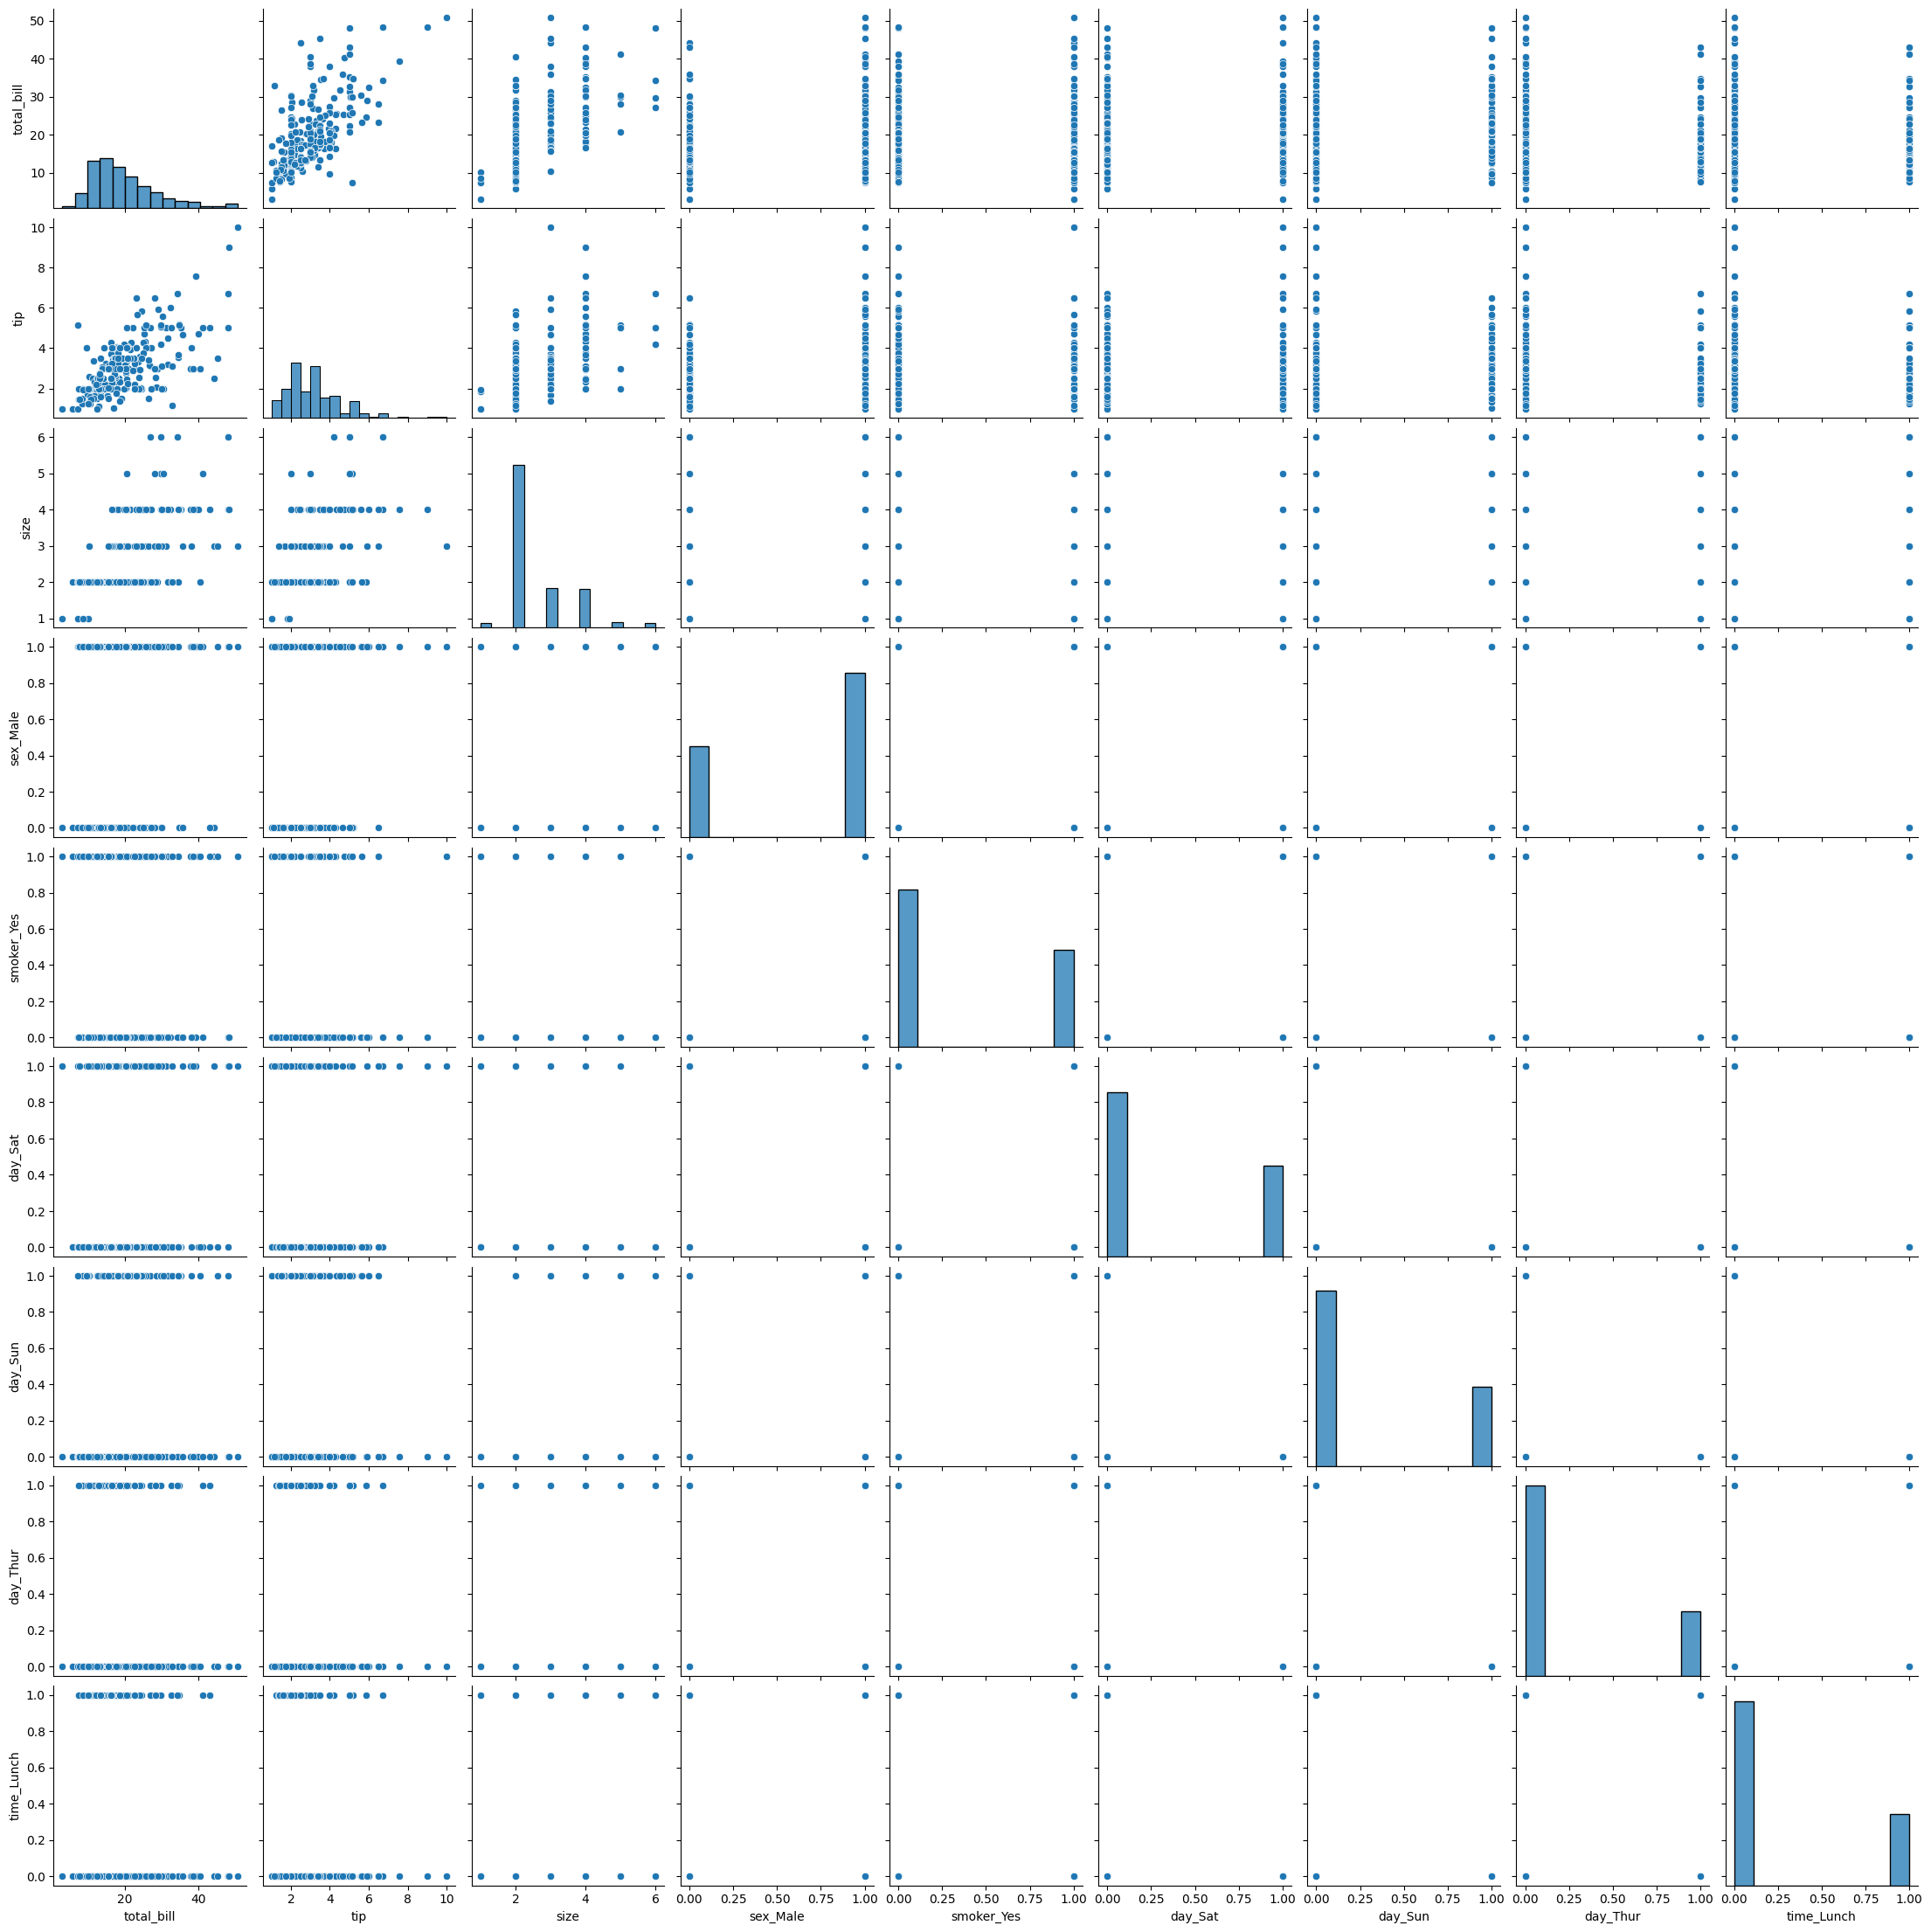

In [51]:
# Pair plot for multiple features
sns.pairplot(data)
plt.show()

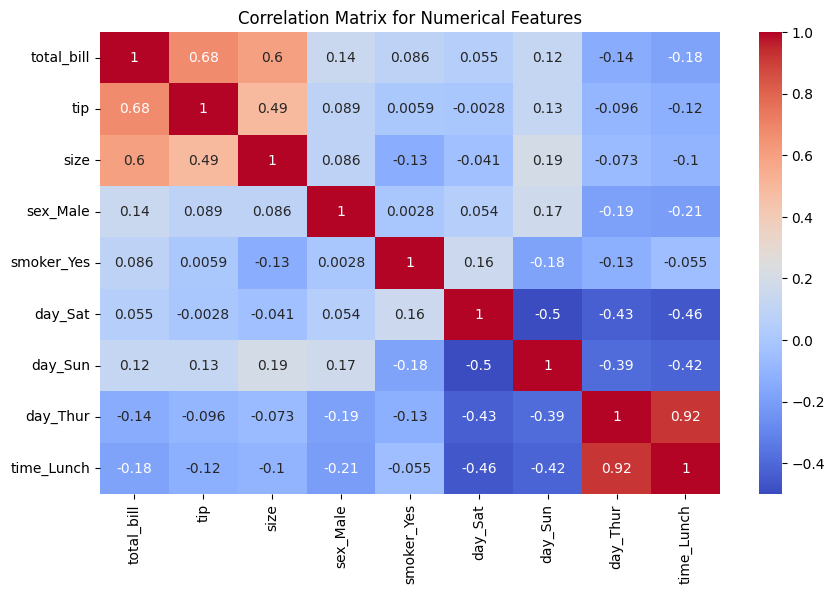

In [52]:
# Correlation matrix (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [53]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 163 entries, 114 to 102
Series name: tip
Non-Null Count  Dtype  
--------------  -----  
163 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [59]:
# Statistical test for linearity (Rainbow Test)
X = data.drop('tip', axis=1)
y = data['tip']


In [63]:
data.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [67]:
data = data.replace({True: 1, False: 0})

<ipython-input-67-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    int64  
 3   sex_Male    244 non-null    int64  
 4   smoker_Yes  244 non-null    int64  
 5   day_Sat     244 non-null    int64  
 6   day_Sun     244 non-null    int64  
 7   day_Thur    244 non-null    int64  
 8   time_Lunch  244 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 17.3 KB


In [72]:
X.head()

,const,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,1.0,16.99,2,0,0,0,1,0,0
1,1.0,10.34,3,1,0,0,1,0,0
2,1.0,21.01,3,1,0,0,1,0,0
3,1.0,23.68,2,1,0,0,1,0,0
4,1.0,24.59,4,0,0,0,1,0,0


In [71]:
# Fit OLS model for Rainbow test
X = sm.add_constant(data[["total_bill","size","sex_Male","smoker_Yes","day_Sat","day_Sun","day_Thur","time_Lunch"]])
# X = sm.add_constant(X)
y = data["tip"]

# Fit a simple OLS model
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)

print(f"Rainbow Test Statistic: {rainbow_stat:.4f}")
print(f"Rainbow Test p-value: {rainbow_p_val:.4f}")
# If p-value < 0.05, we may reject linearity

Rainbow Test Statistic: 1.1971
Rainbow Test p-value: 0.1659


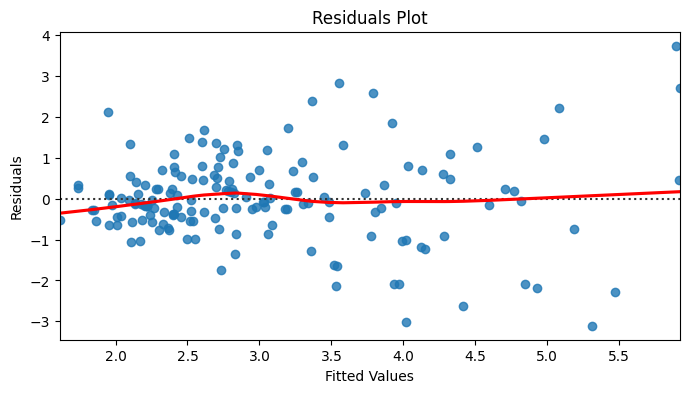

In [73]:
# Residuals plot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train
plt.figure(figsize=(8, 4))
sns.residplot(x=y_pred_train, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [74]:
# Line plot for time-series data (if applicable)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data.sort_values('date', inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(data['date'], data['tip'])
    plt.title('Line Plot of Tip Over Time')
    plt.xlabel('Date')
    plt.ylabel('Tip Amount')
    plt.show()

In [75]:
# Apply suitable regression method based on trends
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model prediction accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Prediction Accuracy:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model Prediction Accuracy:
MAE: 0.76
MSE: 1.00
R-squared: 0.23
